# Colombia vs El Mundo

En el presente se hace una comparación de los datos de Colombia frente a las cifras mudniales referentes al Covid-19.

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
spark = SparkSession.builder.appName('proyectoBigdata').getOrCreate()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1589381067293_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
#Datasets Colombia
cifras_col=spark.read.csv('s3://bigdatacovid/Colombia/cifras_col.csv',inferSchema=True,header=True)
#Datasets mundiales
confirmed = spark.read.csv('s3://bigdatacovid/Global/confirmed_narrow.csv', inferSchema=True, header=True)
deaths = spark.read.csv('s3://bigdatacovid/Global/deaths_narrow.csv', inferSchema=True, header=True)
recovered = spark.read.csv('s3://bigdatacovid/Global/recovered_narrow.csv', inferSchema=True, header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.install_pypi_package('pandas')
sc.install_pypi_package('matplotlib')
from pyspark.sql import functions as f
from pyspark.sql import DataFrameNaFunctions
from pyspark.sql.functions import col, max as max_pyspark
import matplotlib.pyplot as plt
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

## Casos confirmados a través del tiempo

De la siguinte gráfica se puede observar que la situación colombiana es casi igual a la situación mundial en materia de casos confirmados de Covid-19

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

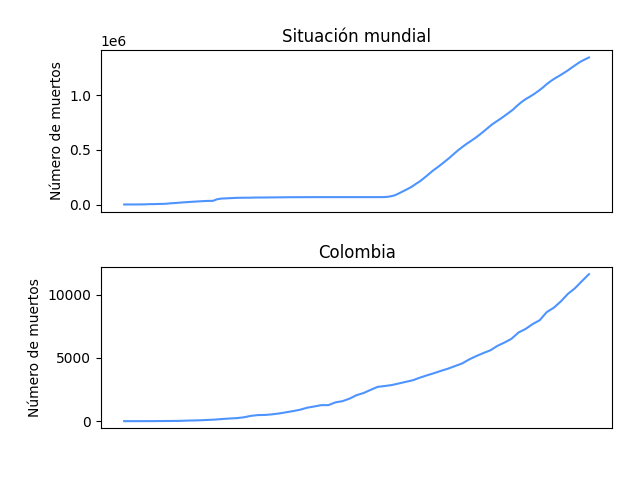

In [4]:
plt.clf()
fig,  (ax5, ax6) = plt.subplots(2)
casos_glo = confirmed.withColumn('Value', col('Value').cast("int")).groupBy('Date').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=True).na.drop('any')
cases_col = cifras_col.select("TOTAL_CASOS").rdd.flatMap(lambda x: x).collect()

cases_glo = casos_glo.toPandas()['max(Value)'].values.tolist()
ax5.plot(cases_glo, color = '#4d94ff')
ax5.set(xlabel='Tiempo', ylabel='Número de muertos',title='Situación mundial')
ax5.axes.get_xaxis().set_visible(False)

ax6.plot(cases_col, color = '#4d94ff')
ax6.set( ylabel='Número de muertos',title='Colombia')

fig.tight_layout(pad=2.0)
plt.xticks([])
%matplot plt

## Muertes a través del tiempo

En la siguiente gráfica se muestra la similaridad de las muertes en Colombia a las muertes a nivel mundial.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

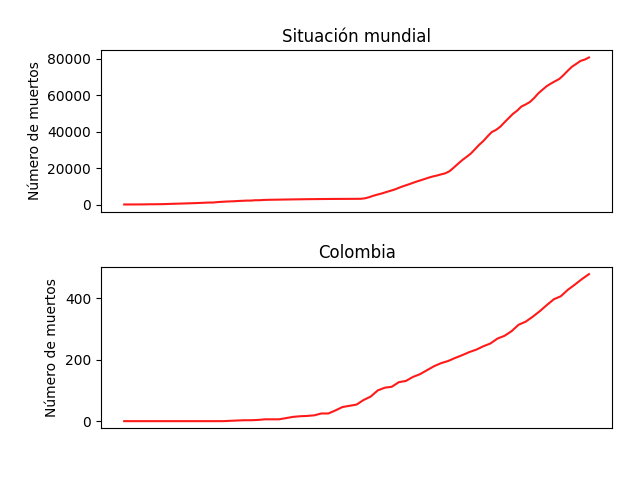

In [5]:
plt.clf()
fig,  (ax3, ax4) = plt.subplots(2)
muertos_glo = deaths.withColumn('Value', col('Value').cast("int")).groupBy('Date').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=True).na.drop('any')
death_col = cifras_col.select("TOTAL_MUERTES").rdd.flatMap(lambda x: x).collect()

death_glo = muertos_glo.toPandas()['max(Value)'].values.tolist()
ax3.plot(death_glo, color = '#ff1a1a')
ax3.set(xlabel='Tiempo', ylabel='Número de muertos',title='Situación mundial')
ax3.axes.get_xaxis().set_visible(False)

ax4.plot(death_col, color = '#ff1a1a')
ax4.set( ylabel='Número de muertos',title='Colombia')

fig.tight_layout(pad=2.0)
plt.xticks([])
%matplot plt

## Recuperados a través del tiempo

La siguiente gráfica muestra cómo los recuperados han aumentato de manera exponencial tanto en Colombia como en el mundo.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

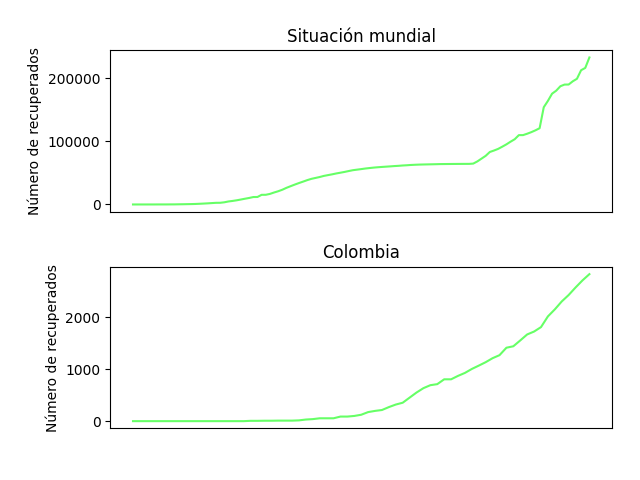

In [6]:
fig,  (ax1, ax2) = plt.subplots(2)

recuperados_glo = recovered.withColumn('Value', col('Value').cast("int")).groupBy('Date').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=True).na.drop('any')
recovered_col = cifras_col.select("TOTAL_RECUPERADOS").rdd.flatMap(lambda x: x).collect()

recovered_glo = recuperados_glo.toPandas()['max(Value)'].values.tolist()
ax1.plot(recovered_glo, color = '#66ff66')
ax1.set(xlabel='Tiempo', ylabel='Número de recuperados',title='Situación mundial')
ax1.axes.get_xaxis().set_visible(False)

ax2.plot(recovered_col, color = '#66ff66')
ax2.set( ylabel='Número de recuperados',title='Colombia')

fig.tight_layout(pad=2.0)
plt.xticks([])
%matplot plt